## Failure Prediction using Feature Eng & Model Optimization

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.datasets import load_iris
import joblib

In [2]:
df = pd.read_csv("ai4i2020.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [3]:
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

In [4]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [5]:
df.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

## EDA

In [6]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


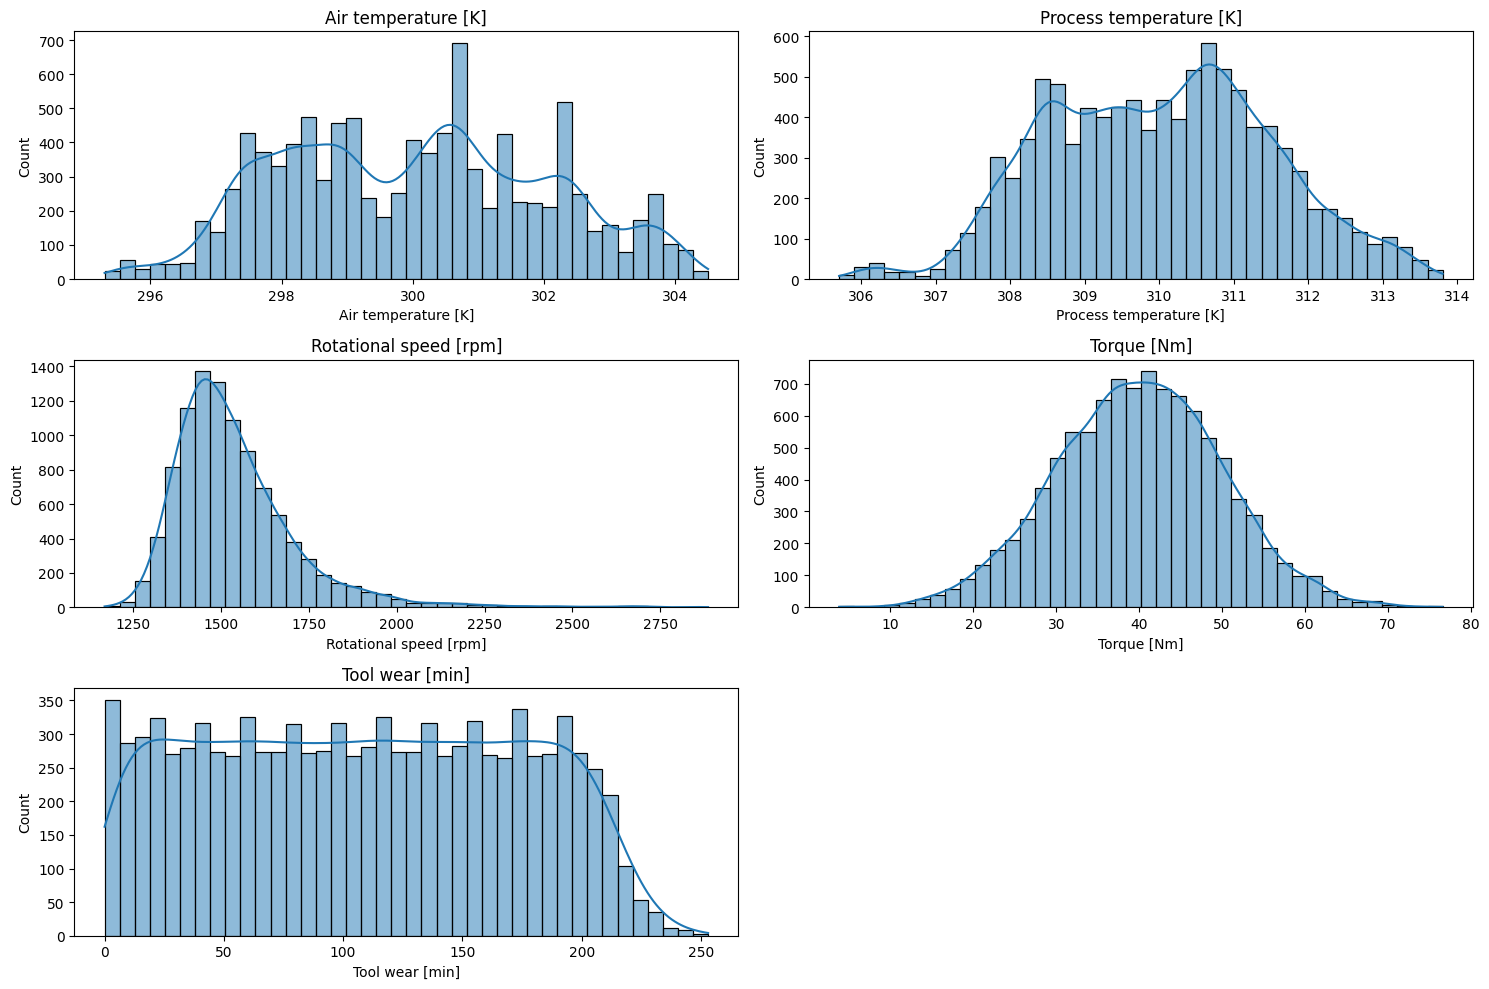

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
num_features = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]'
]

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features):
    plt.subplot(3, 2, i+1)
    sns.histplot(df[col], bins=40, kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

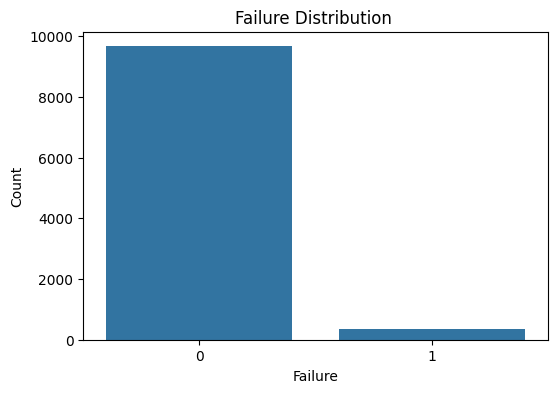

In [8]:
failed_counts = df['Machine failure'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=failed_counts.index, y=failed_counts.values)
plt.title('Failure Distribution ')
plt.xlabel('Failure')
plt.ylabel('Count')
plt.show()

## Feature Engineering

In [9]:
df_fe = df.copy()

df_fe.rename(columns={
    'Air temperature [K]': 'T_air',
    'Process temperature [K]': 'T_proc',
    'Rotational speed [rpm]': 'rpm',
    'Torque [Nm]': 'torque',
    'Tool wear [min]': 'tool_wear'
}, inplace=True)

# Stress Index
df_fe['Stress_Index'] = df_fe['torque'] * df_fe['rpm']

# Tool Wear Rate
df_fe['Tool_Wear_Rate'] = df_fe['tool_wear'] / df_fe['rpm']

# Temperature Difference
df_fe['Temperature_Difference'] = df_fe['T_proc'] - df_fe['T_air']

# Energy Indicator
df_fe['Energy_Indicator'] = df_fe['torque'] * df_fe['rpm']

# Degradation Index
df_fe['Degradation_Index'] = (
    df_fe['tool_wear'] *
    (df_fe['T_proc'] - df_fe['T_air']) /
    df_fe['rpm']
)

# some values become inf
df_fe.replace([np.inf, -np.inf], np.nan, inplace=True)
df_fe.dropna(inplace=True)

df_fe[[
    'Stress_Index',
    'Tool_Wear_Rate',
    'Temperature_Difference',
    'Energy_Indicator',
    'Degradation_Index'
]].head()


,Stress_Index,Tool_Wear_Rate,Temperature_Difference,Energy_Indicator,Degradation_Index
0,66382.8,0.000000,10.5,66382.8,0.000000
1,65190.4,0.002131,10.5,65190.4,0.022372
2,74001.2,0.003338,10.4,74001.2,0.034713
3,56603.5,0.004885,10.4,56603.5,0.050803
4,56320.0,0.006392,10.5,56320.0,0.067116


In [10]:
df_fe= pd.get_dummies(df, columns=['Type'], drop_first=True)
df_fe.head()

,UDI,Product ID,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,Type_L,Type_M
0,1,M14860,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,False,True
1,2,L47181,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,True,False
2,3,L47182,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,True,False
3,4,L47183,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,True,False
4,5,L47184,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,True,False


In [11]:
X = df_fe.drop(columns=['Machine failure'])
y = df_fe['Machine failure']


# drop useless columns
X = X.drop(columns=['UDI', 'Product ID'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

### Why scaling is important for some models? 
- it is importatnt if models rely on distance calculations like KNN and SVM, since the large scales can make the model biased towards features with larger scales.

### How you split your data and why? 
- using a  80/20 split to keep the larger portion for training while reserving a smaller portion for testing.
- we can also make a valdiation set from the training set using cross-validation like k-fold.

## Feature Selection

In [13]:
from sklearn.feature_selection import f_classif

# Compute ANOVA scores on scaled training data
f_scores,_ = f_classif(X_train_s, y_train)

anova_df = pd.DataFrame({
    'Feature': X.columns,
    'F_Score': f_scores,
}).sort_values(by='F_Score', ascending=False)

anova_df

,Feature,F_Score
6,HDF,3592.042305
8,OSF,3352.484421
7,PWF,3352.484421
5,TWF,1183.721017
3,Torque [Nm],299.652691
4,Tool wear [min],79.510174
0,Air temperature [K],59.595325
10,Type_L,17.827876
1,Process temperature [K],13.368058
2,Rotational speed [rpm],12.795748


In [14]:
# drop last features RNF

X_train_anova = X_train.drop(columns=['RNF'])
X_test_anova = X_test.drop(columns=['RNF'])

scaler = StandardScaler()
X_train_anova_s = scaler.fit_transform(X_train_anova)
X_test_anova_s = scaler.transform(X_test_anova)

In [15]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear', random_state=42)

rfe = RFE(
    estimator=svm_linear,
    n_features_to_select=10
)

rfe.fit(X_train_s, y_train)


,"estimator estimator: ``Estimator`` instanceA supervised learning estimator with a ``fit`` method that providesinformation about feature importance(e.g. `coef_`, `feature_importances_`).",SVC(kernel='l...ndom_state=42)
,"n_features_to_select n_features_to_select: int or float, default=NoneThe number of features to select. If `None`, half of the features areselected. If integer, the parameter is the absolute number of featuresto select. If float between 0 and 1, it is the fraction of features toselect... versionchanged:: 0.24 Added float values for fractions.",10
,"step step: int or float, default=1If greater than or equal to 1, then ``step`` corresponds to the(integer) number of features to remove at each iteration.If within (0.0, 1.0), then ``step`` corresponds to the percentage(rounded down) of features to remove at each iteration.",1
,"verbose verbose: int, default=0Controls verbosity of output.",0
,"importance_getter importance_getter: str or callable, default='auto'If 'auto', uses the feature importance either through a `coef_`or `feature_importances_` attributes of estimator.Also accepts a string that specifies an attribute name/pathfor extracting feature importance (implemented with `attrgetter`).For example, give `regressor_.coef_` in case of:class:`~sklearn.compose.TransformedTargetRegressor` or`named_steps.clf.feature_importances_` in case ofclass:`~sklearn.pipeline.Pipeline` with its last step named `clf`.If `callable`, overrides the default feature importance getter.The callable is passed with the fitted estimator and it shouldreturn importance for each feature... versionadded:: 0.24",'auto'
,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True


In [16]:
selected_features_rfe = X.columns[rfe.support_]
selected_features_rfe


Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'TWF', 'HDF', 'PWF', 'OSF',
       'Type_L', 'Type_M'],
      dtype='object')

In [17]:
X_train_rfe = X_train[selected_features_rfe]
X_test_rfe = X_test[selected_features_rfe]

scaler = StandardScaler()
X_train_rfe_s = scaler.fit_transform(X_train_rfe)
X_test_rfe_s = scaler.transform(X_test_rfe)

In [18]:
# All features
svm_full = SVC(kernel='rbf', random_state=42)
svm_full.fit(X_train_s, y_train)
acc_full = metrics.accuracy_score(y_test, svm_full.predict(X_test_s))

# ANOVA-selected
svm_anova = SVC(kernel='rbf', random_state=42)
svm_anova.fit(X_train_anova_s, y_train)
acc_anova = metrics.accuracy_score(y_test, svm_anova.predict(X_test_anova_s))

# RFE-selected
svm_rfe = SVC(kernel='rbf', random_state=42)
svm_rfe.fit(X_train_rfe_s, y_train)
acc_rfe = metrics.accuracy_score(y_test, svm_rfe.predict(X_test_rfe_s))

print(f"All features accuracy:   {acc_full:.4f}")
print(f"ANOVA features accuracy: {acc_anova:.4f}")
print(f"RFE features accuracy:   {acc_rfe:.4f}")


All features accuracy:   0.9990
ANOVA features accuracy: 0.9990
RFE features accuracy:   0.9990


In [19]:
from sklearn.svm import SVC

svm_model = SVC(random_state=42)
svm_model.fit(X_train_s, y_train)


,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [20]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_s, y_train)


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current

In [21]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_s, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [22]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    }


In [23]:
results = {}

results['SVM'] = evaluate_model(svm_model, X_test_s, y_test)
results['Decision Tree'] = evaluate_model(dt_model, X_test_s, y_test)
results['Random Forest'] = evaluate_model(rf_model, X_test_s, y_test)

results_df = pd.DataFrame(results).T
results_df

,Accuracy,Precision,Recall,F1-score
SVM,0.9990,1.000000,0.970588,0.985075
Decision Tree,0.9985,0.985075,0.970588,0.977778
Random Forest,0.9990,1.000000,0.970588,0.985075


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

svm_param_grid = {
    'C': [i/100 for i in range(1, 100, 10)],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=svm_param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

svm_grid.fit(X_train_s, y_train)
print("Best SVM Parameters:", svm_grid.best_params_)


Best SVM Parameters: {'C': 0.01, 'gamma': 'scale', 'kernel': 'linear'}


In [25]:
dt_param_grid = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=dt_param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

dt_grid.fit(X_train_s, y_train)
print("Best Decision Tree Parameters:", dt_grid.best_params_)


Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [26]:
rf_param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

rf_grid = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=rf_param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1
)

rf_grid.fit(X_train_s, y_train)
print("Best Random Forest Parameters:", rf_grid.best_params_)


/home/maxmaster/data/ITI/workspace/ai/.venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Random Forest Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [31]:
def evaluate_best(grid_model, X_test, y_test):
    y_pred = grid_model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    }

results_tuned = {}

results_tuned['SVM'] = evaluate_best(svm_grid, X_test_s, y_test)
results_tuned['Decision Tree'] = evaluate_best(dt_grid, X_test_s, y_test)
results_tuned['Random Forest'] = evaluate_best(rf_grid, X_test_s, y_test)

pd.DataFrame(results_tuned).T


,Accuracy,Precision,Recall,F1-score
SVM,0.999,1.0,0.970588,0.985075
Decision Tree,0.999,1.0,0.970588,0.985075
Random Forest,0.999,1.0,0.970588,0.985075


### Did tuning improve performance? For which models?
- yes, tuning improved performance for both Decision Tree by optimizing hyperparameters.

### Which model is now the best overall?
- the models have the same F1 score after tuning, so no winner.